In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Прочитайте csv файл (використовуйте функцію read_csv)

In [2]:
books = pd.read_csv('bestsellers with categories.csv')

### Виведіть перших п'ять рядків (використовується функція head)

In [3]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Виведіть розміри датасету (використовуйте атрибут shape)

In [4]:
books.shape

(550, 7)

Про скільки книг зберігає дані датасет? Про 550 книг

Для кожної з книг є 7 змінних (колонок). Давайте розглянемо їх детальніше:
- Name - назва книги
- Author - Автор
- User Rating - рейтинг (за 5-бальною шкалою)
- Reviews - кількість відгуків
- Price - ціна (у доларах станом на 2020 рік)
- Year - рік, коли книга потрапила до рейтингу Топ-50
- Genre - Жанр

Для спрощення подальшої роботи, давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить прогалину. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на невеликий, а пропуск замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns(можна просто присвоїти список нових імен цьому атрибуту)

`df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']`

In [5]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Перевірте у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

Чи є в якихось змінних пропустки? (Так / ні) Ні

In [6]:
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Перевірте, які унікальні значення в колонці genre (використовуйте функцію unique)

Які є унікальні жанри? Non-fiction та Fiction

In [7]:
books['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

### Тепер подивіться розподіл цін: побудуйте діаграму (використовуйте kind='hist')

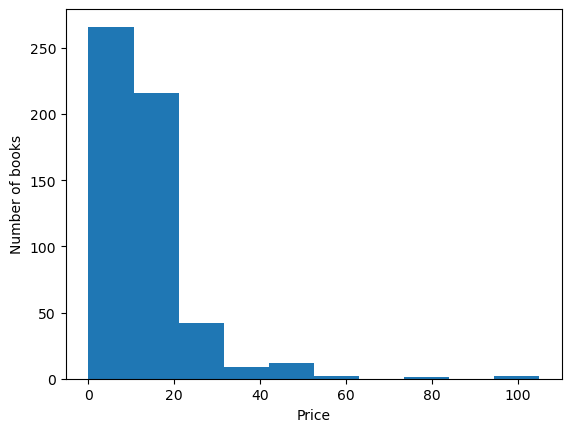

In [8]:
books['price'].plot(kind='hist')
plt.xlabel('Price')
plt.ylabel('Number of books')
plt.show()

### Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

- Максимальна ціна? - 105
- Мінімальна ціна? - 0
- Середня ціна? - 13.1
- Медіанна ціна? - 11

In [9]:
books['price'].max()

105

In [10]:
books['price'].min()

0

In [11]:
books['price'].mean()

13.1

In [12]:
books['price'].median()

11.0

In [13]:
books['price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

### Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [14]:
books['user_rating'].max()

4.9

### Скільки книг мають такий рейтинг? Відповідь: 52(28 - без дублікатів)

In [15]:
books[books['user_rating'] == 4.9]['name'].count()

52

In [16]:
books[books['user_rating'] == 4.9]['name'].drop_duplicates().count()

28

### Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [17]:
books[ books['reviews'] == books['reviews'].max() ]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


### З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychologic...

In [18]:
max_price = books[books['year'] == 2015]['price'].max()
max_price

46

In [19]:
books[(books['year'] == 2015) & (books['price'] == max_price)][['name']]

,name
277,Publication Manual of the American Psychologic...


### Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [20]:
books[(books['year'] == 2010) & (books['genre'] == 'Fiction')].count()['name']

20

### Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1 книга

In [21]:
books[ (books['user_rating'] == 4.9 ) & ((books['year']==2010) | (books['year'] == 2011)) ].count()['name']

1

### І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили в рейтинг у 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).	

In [22]:
books[(books['price'] < 8) & (books['year'] == 2015)].sort_values('price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


### Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

### Остання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, pandas робить усі операції простими та зрозумілими.

### Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберете тільки потрібні вам
- Максимальна ціна для жанру Fiction? Відповідь: 82
- Мінімальна ціна для жанру Fiction? Відповідь: 0
- Максимальна ціна для жанру Non Fiction? Відповідь: 105
- Мінімальна ціна для жанру Non Fiction? Відповідь: 0

In [23]:
books.groupby(['genre'])[['price']].agg([np.min, np.max])

price     
             amin amax
genre                 
Fiction         0   82
Non Fiction     0  105

### Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby і agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
- Якої розмірності вийшла таблиця? Відповідь: (248, 1)
- У якого автора найбільше книг? Відповідь: Jeff Kinney
- Скільки книг у цього автора? Відповідь: 12

In [24]:
author_books = books.groupby(['author'])[['name']].count()
author_books

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [25]:
author_books [author_books['name'] == author_books['name'].max()]

,name
author,
Jeff Kinney,12


### Тепер створіть другий датафрейм, який вміщуватиме середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
- У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
- Який у цього автора середній рейтинг? Відповідь: 3.9

In [26]:
avg_rating = books.groupby(['author'])[['user_rating']].agg(np.mean).round(1)
avg_rating[avg_rating['user_rating'] == avg_rating['user_rating'].min()]

,user_rating
author,
Donna Tartt,3.9


### З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [27]:
book_and_rating = pd.concat([avg_rating, author_books], axis=1)
book_and_rating

,user_rating,name
author,,
Abraham Verghese,4.6,2
Adam Gasiewski,4.4,1
Adam Mansbach,4.8,1
Adir Levy,4.8,1
Admiral William H. McRaven,4.7,1
...,...,...
Walter Isaacson,4.6,3
William Davis,4.4,2
William P. Young,4.6,2


### Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
- Який автор перший у списку? Відповідь: Muriel Barbery

In [28]:
book_and_rating.sort_values(by=['name', 'user_rating'])

,user_rating,name
author,,
Muriel Barbery,4.0,1
Chris Cleave,4.1,1
Ian K. Smith M.D.,4.1,1
Pierre Dukan,4.1,1
Elizabeth Strout,4.2,1
...,...,...
American Psychological Association,4.5,10
Gary Chapman,4.7,11
Suzanne Collins,4.7,11
